## Working With Time Series in Pandas


For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

## SF Temps

> ##### pip install vega_datasets

You can use this library like so:
- from vega_datasets import data
- data.sf_temps()
--------------------------------
- from vega_datasets import data
- data.sf_temps()
- Use


In [125]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Datetime imports
import datetime

# Import the data
from vega_datasets import data

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

In [126]:
# Call and re-assign df
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [128]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [135]:
# Create columns

df['date'] = pd.to_datetime(df.date)
df['weekday'] = df.date.dt.day_name()
df['month'] = df.date.dt.month
df.head(3)

,temp,date,weekday,month
0,47.8,2010-01-01 00:00:00,Friday,1
1,47.4,2010-01-01 01:00:00,Friday,1
2,46.9,2010-01-01 02:00:00,Friday,1


#### (1). Resample by the day and take the average temperature. Visualize the average temperature over time.

In [136]:
# First set index the dates

df = df.set_index('date').sort_index()

In [137]:
df.head()

,temp,weekday,month
date,,,
2010-01-01 00:00:00,47.8,Friday,1
2010-01-01 01:00:00,47.4,Friday,1
2010-01-01 02:00:00,46.9,Friday,1
2010-01-01 03:00:00,46.5,Friday,1
2010-01-01 04:00:00,46.0,Friday,1


In [214]:
resample_day = df.resample('D').mean()

Text(0.5, 0, 'Months')

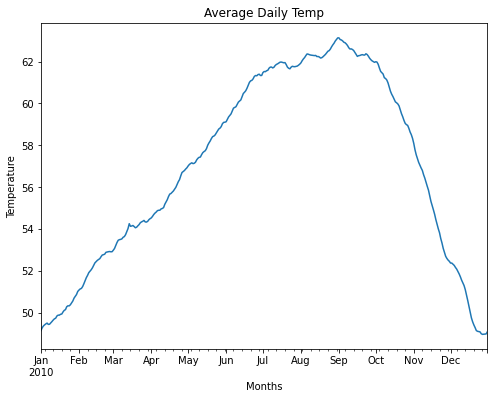

In [344]:
resample_day.temp.plot()
plt.title('Average Daily Temp')
plt.ylabel('Temperature')
plt.xlabel('Months')

#### (2). Write the code necessary to visualize the minimum temperature over time.


In [166]:
# Find minimum temp
df.temp.min()

45.6

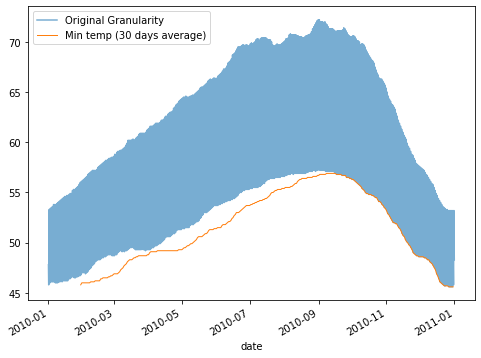

In [358]:
df.temp.plot(label='Original Granularity', alpha = 0.6)
df.resample('D').min().temp.rolling(30).min().plot(label='Min temp (30 days average)', lw = 1)
plt.legend()
plt.show()

#### (3). Write the code necessary to visualize the maximum temperature over time.


In [192]:
# Find max temp
df.temp.max()

72.2

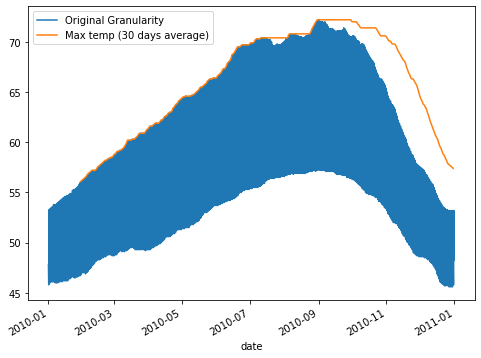

In [191]:
df.temp.plot(label='Original Granularity')
df.resample('D').max().temp.rolling(30).max().plot(label='Max temp (30 days average)')
plt.legend()
plt.show()

#### (4). Which month is the coldest, on average?

December


In [218]:
# Resample monthly temps

montly_resample = df.resample('M').mean()

<AxesSubplot:xlabel='date'>

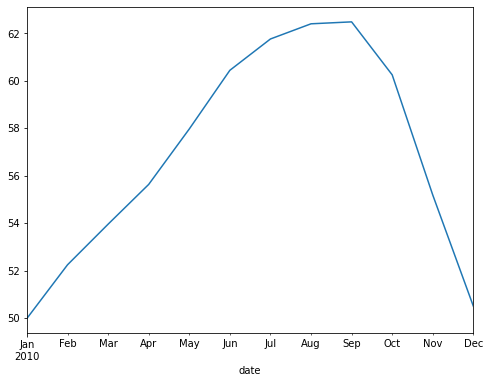

In [219]:
montly_resample.temp.plot()

<AxesSubplot:xlabel='date'>

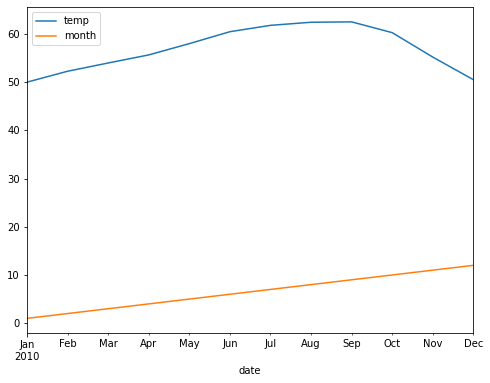

In [235]:
montly_resample.assign(montly_avg = lambda montly_resample: montly_resample.temp.rolling(30).min())

montly_resample.plot()

#### (5). Which month has the highest average temperature?

Aug - September


<AxesSubplot:xlabel='date'>

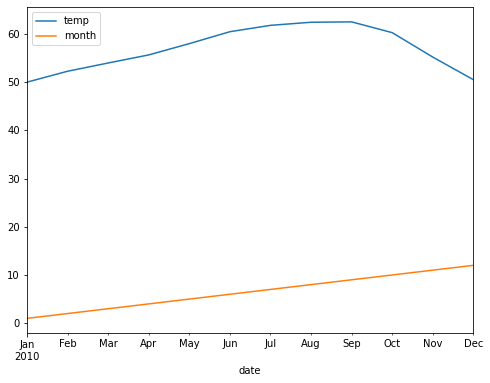

In [241]:
montly_resample.assign(montly_avg = lambda montly_resample: montly_resample.temp.rolling(30).max())
montly_resample.plot()


#### (6). Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

<AxesSubplot:xlabel='date'>

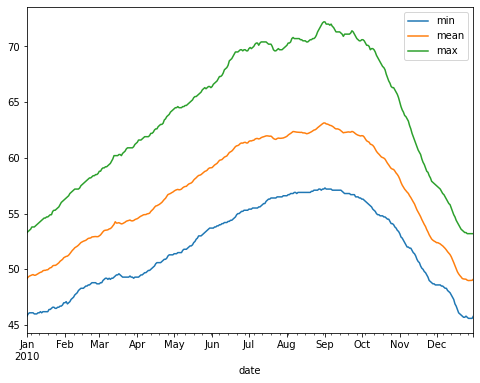

In [353]:
df.resample('D').temp.agg(['min', 'mean', 'max']).plot()

### Bonus

#### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

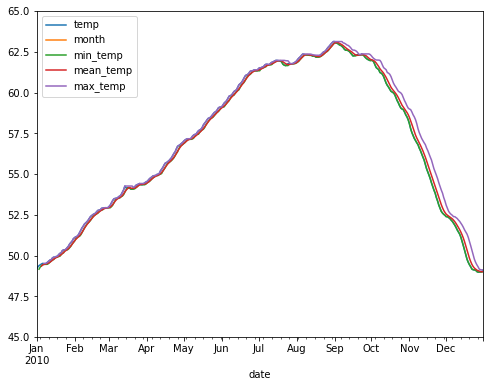

In [350]:
rolling_df = df.resample('D').mean().assign(
    min_temp=lambda df: df.temp.rolling(3).min(),
    mean_temp=lambda df: df.temp.rolling(5).mean(),
    max_temp=lambda df: df.temp.rolling(7).max(),
)
rolling_df.plot()
plt.ylim(45, 65)
None

## Seatle Weather

Use the dataset to answer the following questions:

In [332]:
# Acquire Seatle Weather data
from vega_datasets import data
climate= data.seattle_weather()
climate.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [333]:
# Create columns
climate['date'] = pd.to_datetime(climate.date)
climate['weekday'] = climate.date.dt.day_name()
climate['month'] = climate.date.dt.month
climate['year'] = climate.date.dt.year
climate.head(3)

,date,precipitation,temp_max,temp_min,wind,weather,weekday,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,1,2012


### Index the date column

In [334]:
climate = climate.set_index('date').sort_index()

In [335]:
climate.head(3)

,precipitation,temp_max,temp_min,wind,weather,weekday,month,year
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,1,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,1,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,1,2012


Which year and month combination has the highest amount of precipitation?

year  month
2012  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)
      8        AxesSubplot(0.125,0.125;0.775x0.755)
      9        AxesSubplot(0.125,0.125;0.775x0.755)
      10       AxesSubplot(0.125,0.125;0.775x0.755)
      11       AxesSubplot(0.125,0.125;0.775x0.755)
      12       AxesSubplot(0.125,0.125;0.775x0.755)
2013  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)


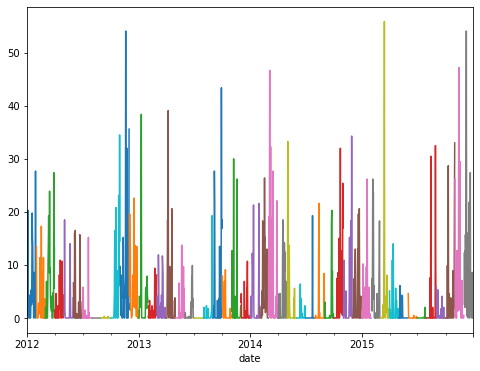

In [336]:
climate.groupby(['year','month']).precipitation.plot()

Visualize the amount of monthly precipitation over time.

Text(0.5, 0, 'Month')

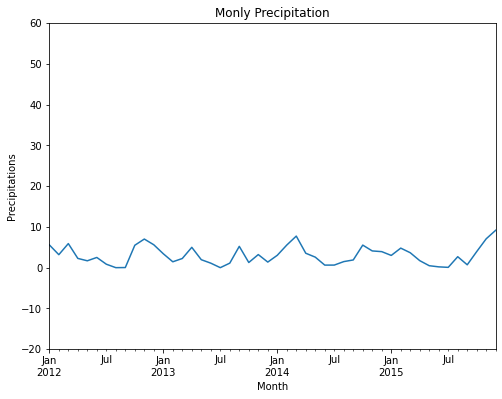

In [337]:
climate.precipitation.resample('M').mean().plot()
plt.ylim(-20, 60)
plt.title('Monly Precipitation')
plt.ylabel('Precipitations')
plt.xlabel('Month')

Visualize the amount of wind over time. Choose a time interval you think is appropriate.


Text(0.5, 0, 'Month')

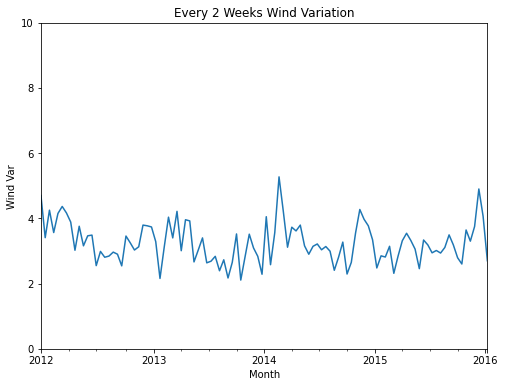

In [338]:
climate.wind.resample('2W').mean().plot()
plt.ylim(0.0, 10)
plt.title('Every 2 Weeks Wind Variation')
plt.ylabel('Wind Var')
plt.xlabel('Month')

Which year-month combination is the windiest?


year  month
2012  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)
      8        AxesSubplot(0.125,0.125;0.775x0.755)
      9        AxesSubplot(0.125,0.125;0.775x0.755)
      10       AxesSubplot(0.125,0.125;0.775x0.755)
      11       AxesSubplot(0.125,0.125;0.775x0.755)
      12       AxesSubplot(0.125,0.125;0.775x0.755)
2013  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)


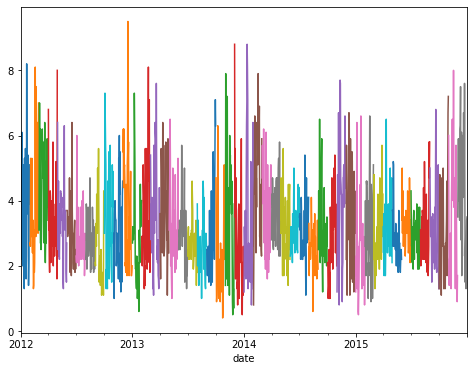

In [339]:
climate.groupby(['year','month']).wind.plot()

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


<AxesSubplot:xlabel='date'>

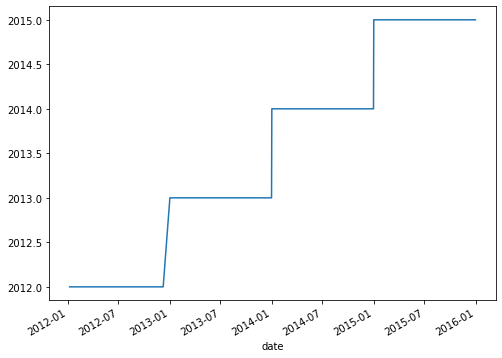

In [340]:
sunny_year = climate[climate.weather == 'sun']

sunny_year.year.plot()

In which month does it rain the most?


In [341]:
climate.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
rainy_df = climate
climate.resample('M').

In [ ]:
Which month has the most number of days with a non-zero amount of precipitation?